### Purpose

To demonstrate the tradeoffs between accuracy and computational load presented by decision trees and random forests. Decision trees use only a fraction of the processing power that a whole forest does. However the forest can often be much more accurate. 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sqlalchemy import create_engine
import time
from sklearn.model_selection import train_test_split

%matplotlib inline

In [26]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [9]:
# use the reduced dataset from the last assignment
df = pd.read_csv('loan_staus_reduced.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420801 entries, 0 to 420800
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            420801 non-null  int64  
 1   int_rate              420801 non-null  float64
 2   installment           420801 non-null  float64
 3   grade                 420801 non-null  object 
 4   emp_length            420801 non-null  float64
 5   home_ownership        420801 non-null  object 
 6   annual_inc            420801 non-null  float64
 7   loan_status           420801 non-null  object 
 8   last_pymnt_d          420801 non-null  object 
 9   last_pymnt_amnt       420801 non-null  float64
 10  next_pymnt_d          420801 non-null  object 
 11  record_last_10_years  420801 non-null  float64
 12  delinq_last_10_years  420801 non-null  float64
 13  recent_revol_delinq   420801 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 44.

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

Text(0.5, 1.0, 'Max Features')

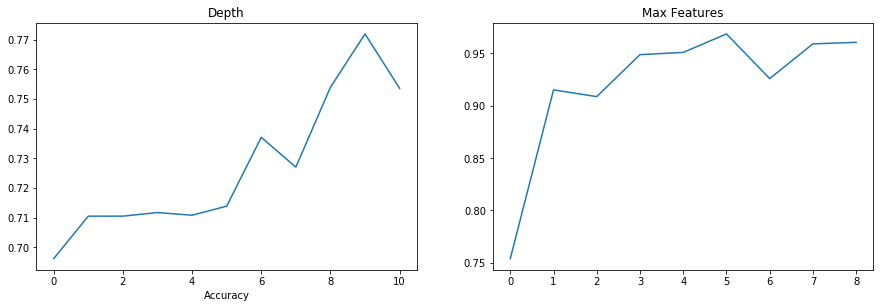

In [23]:
depth_scores = []
for depth in range(1,12):
    # Initialize and train our tree.
    decision_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_features=1,
        max_depth=depth,
        random_state = 4123 # keep the random state the same to best see how my changes impact the model
    )
    decision_tree.fit(X_train, y_train)
    depth_scores.append(decision_tree.score(X_test, y_test))
    
    
features_scores = [] 
for feature in range(1,10):
    # Initialize and train our tree.
    decision_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_features=feature,
        max_depth=9,
        random_state = 4123 # keep the random state the same to best see how my changes impact the model
    )
    decision_tree.fit(X_train, y_train)
    features_scores.append(decision_tree.score(X_test, y_test))
    
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)
plt.plot(depth_scores)
plt.title('Depth')
plt.xlabel('Accuracy')

plt.subplot(2,2,2)
plt.plot(features_scores)
plt.title('Max Features')
#print('Train score results: ', decision_tree.score(X_train, y_train), '\n', '=' * 22)
#print ('Test score results: ', decision_tree.score(X_test, y_test))

In [24]:
# Time the decision tree
start_time = time.time()

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=5,
    max_depth=9,
    random_state = 1337
)
print(cross_val_score(decision_tree, X_train, y_train, cv=10).mean())
print("--- %s seconds ---" % (time.time() - start_time))

0.9115747782002537
--- 8.98632264137268 seconds ---


In [25]:
decision_tree.fit(X_train, y_train)

decision_tree.score(X_test, y_test)

0.8980808167222745

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score


predictions = decision_tree.predict(X_test)
confusion = confusion_matrix(y_test, predictions)

[[  663     4     0  6505     0     0     0]
 [    0 71037     0  1020     7     0     1]
 [    0    97    70     0     0     0    23]
 [  267   425     0 21117     0     0    34]
 [    0  1039     0     1     1     0     1]
 [    0   441     0    21     0     0     6]
 [    0   632     5   192     0     1  1591]]


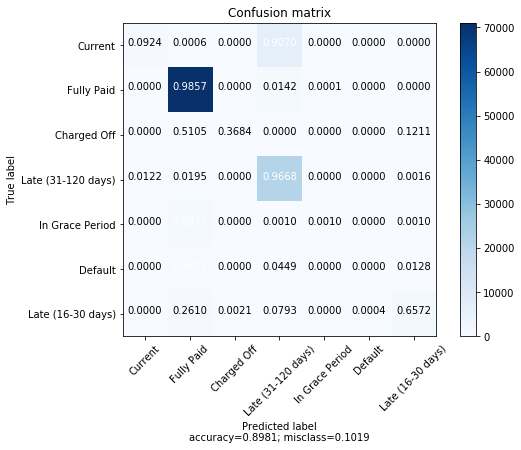

In [33]:
plot_confusion_matrix(confusion, y.unique())

In [43]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)
fbeta_precision = fbeta_score(y_test, predictions, 0.5, average=None)
fbeta_recall = fbeta_score(y_test, predictions, 2, average=None)

print('Accuracy score: {}'.format(accuracy))
print('Precision score: {}'.format(precision.mean()))
print('Recall score: {}'.format(recall.mean()))
print('F1 score: {}'.format(f1.mean()))
print('Fbeta score favoring precision: {}'.format(fbeta_precision.mean()))
print('FBeta score favoring recall: {}'.format(fbeta_recall.mean()))

Accuracy score: 0.8980808167222745
Precision score: 0.6325693796068265
Recall score: 0.43878399235343857
F1 score: 0.46888936848616647
Fbeta score favoring precision: 0.5200579214904285
FBeta score favoring recall: 0.4462233597640989


## Compare to a Simple Forest

In [52]:
# Time the random forest

start_time = time.time()


y = df['loan_status']
X = df.drop('loan_status', axis=1)
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1312)
rfc = ensemble.RandomForestClassifier(
    n_estimators=100
    ,max_depth=6)
print(cross_val_score(rfc, X_train, y_train, cv=10).mean())

print("--- %s seconds ---" % (time.time() - start_time))

0.964648288973384
--- 189.84185075759888 seconds ---


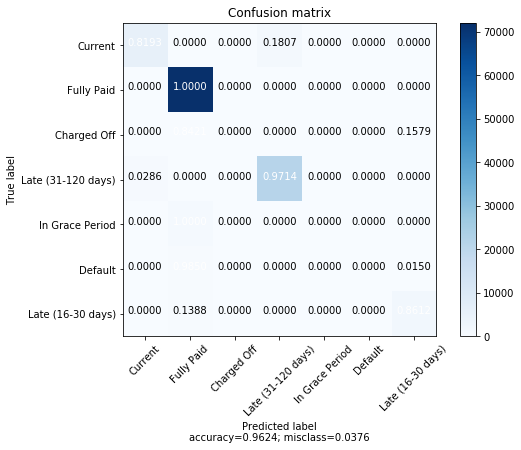

In [50]:
rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)

confusion = confusion_matrix(y_test, predictions)

plot_confusion_matrix(confusion, y.unique())

In [51]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)
fbeta_precision = fbeta_score(y_test, predictions, 0.5, average=None)
fbeta_recall = fbeta_score(y_test, predictions, 2, average=None)

print('Accuracy score: {}'.format(accuracy))
print('Precision score: {}'.format(precision.mean()))
print('Recall score: {}'.format(recall.mean()))
print('F1 score: {}'.format(f1.mean()))
print('Fbeta score favoring precision: {}'.format(fbeta_precision.mean()))
print('FBeta score favoring recall: {}'.format(fbeta_recall.mean()))

/home/owen/bin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score: 0.9623957947167803
Precision score: 0.5431445461401413
Recall score: 0.521706305273126
F1 score: 0.531499825741253
Fbeta score favoring precision: 0.5382440384813832
FBeta score favoring recall: 0.5254205675733938


The random forest has a higher accuracy score but when we dive into some more detailed measurements of sucess we see that the story is a little more complicated. The Forest has a better recall score but the decision tree has a much better precision score. This dataset went through only limited data cleaning and feature engineering so there is lots of room for imporvement for the next iteration. Going forward I might use a deciion tree or a very simple forest (ie few trees) in order to better determine which features have the most predictive power. Using a tree for feature selection and a forest for the final modeling.